In [27]:
import numpy as np
from math import log 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

In [2]:
#рисует один scatter plot
def scatter(actual, predicted, T):
    plt.scatter(actual, predicted)
    plt.xlabel("Labels")
    plt.ylabel("Predicted probabilities")
    plt.plot([-0.2, 1.2], [T, T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    
# рисует несколько scatter plot в таблице, имеющей размеры shape
def many_scatters(actuals, predicteds, Ts, titles, shape):
    plt.figure(figsize=(shape[1]*5, shape[0]*5))
    i = 1
    for actual, predicted, T, title in zip(actuals, predicteds, Ts, titles):
        ax = plt.subplot(shape[0], shape[1], i)
        ax.set_title(title)
        i += 1
        scatter(actual, predicted, T)

In [11]:


actual_1 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                    0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                    1.,  1.,  1.,  1.])
predicted_1 = np.array([ 0.41310733,  0.43739138,  0.22346525,  0.46746017,  0.58251177,
            0.38989541,  0.43634826,  0.32329726,  0.01114812,  0.41623557,
            0.54875741,  0.48526472,  0.21747683,  0.05069586,  0.16438548,
            0.68721238,  0.72062154,  0.90268312,  0.46486043,  0.99656541,
            0.59919345,  0.53818659,  0.8037637 ,  0.272277  ,  0.87428626,
            0.79721372,  0.62506539,  0.63010277,  0.35276217,  0.56775664])

actual_10 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                1.,  1.,  1.])
predicted_10 = np.array([ 0.29340574, 0.47340035,  0.1580356 ,  0.29996772,  0.24115457,  0.16177793,
                         0.35552878,  0.18867804,  0.38141962,  0.20367392,  0.26418924, 0.16289102, 
                         0.27774892,  0.32013135,  0.13453541, 0.39478755,  0.96625033,  0.47683139,  
                         0.51221325,  0.48938235, 0.57092593,  0.21856972,  0.62773859,  0.90454639,  0.19406537,
                         0.32063043,  0.4545493 ,  0.57574841,  0.55847795 ])
actual_11 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_11 = np.array([ 0.35929566, 0.61562123,  0.71974688,  0.24893298,  0.19056711,  0.89308488,
            0.71155538,  0.00903258,  0.51950535,  0.72153302,  0.45936068,  0.20197229,  0.67092724,
                         0.81111343,  0.65359427,  0.70044585,  0.61983513,  0.84716577,  0.8512387 ,  
                         0.86023125,  0.7659328 ,  0.70362246,  0.70127618,  0.8578749 ,  0.83641841,  
                         0.62959491,  0.90445368])

actual состоит из нулей и единиц, а predicted - из величин из интервала [0, 1] (вероятности класса 1). 


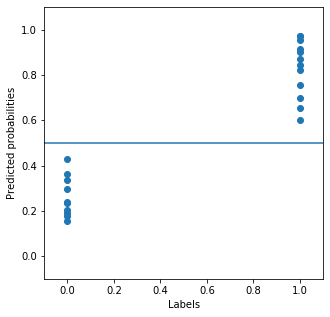

In [5]:
plt.figure(figsize=(5, 5))
scatter(actual_0, predicted_0, 0.5)

Чтобы сделать финальное предсказание (бинарное), нужно установить порог T: все объекты, имеющие предсказание выше порога, относят к классу 1, остальные - к классу 0  
Интервалы вероятностей для двух классов разделяются порогом T = 0.5  
Чаще всего интервалы накладываются - тогда нужно аккуратно подбирать порог

Две популярные метрики - precision и recall. Первая показывает, как часто алгоритм предсказывает класс 1 и оказывается правым, а вторая - как много объектов класса 1 алгоритм нашел.  Третья accuracy; она показывает долю правильных ответов.  
 

Метрикам не важны величины вероятностей, им важно только то, сколько объектов неправильно зашли за установленную границу (в данном случае T = 0.5).

 # Как меняются precision и recall при увеличении порога T

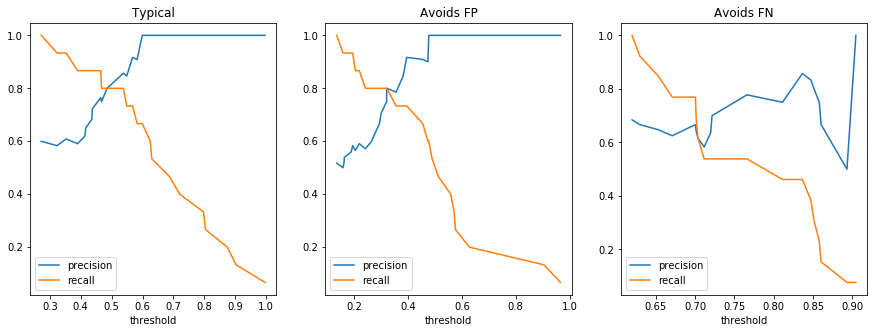

In [12]:
precs = []
recs = []
threshs = []
labels = ["Typical", "Avoids FP", "Avoids FN"]
for actual, predicted in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1, predicted_10, predicted_11]):
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)
plt.figure(figsize=(15, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    plt.plot(threshs[i], precs[i][:-1], label="precision")
    plt.plot(threshs[i], recs[i][:-1], label="recall")
    plt.xlabel("threshold")
    ax.set_title(labels[i])
    plt.legend()

При увеличении порога мы делаем меньше ошибок FP и больше ошибок FN, поэтому одна из кривых растет, а вторая  - падает. По такому графику можно подобрать оптимальное значение порога, при котором precision и recall будут приемлемы. Если такого порога не нашлось, нужно обучать другой алгоритм. 

Приемлемые значения precision и recall определяются предметной областью. Например, в задаче определения, болен ли пациент определенной болезнью (0 - здоров, 1 - болен), ошибок false negative стараются избегать, требуя recall около 0.9. Можно сказать человеку, что он болен, и при дальнейшей диагностике выявить ошибку; гораздо хуже пропустить наличие болезни.

Очевидный недостаток пары метрик precision-recall - в том, что их две: непонятно, как ранжировать алгоритмы. Чтобы этого избежать, используют F1-метрику, которая равна среднему гармоническому precision и recall. 
F1-метрика будет равна 1, если и только если precision = 1 и recall = 1 (идеальный алгоритм). 

In [13]:
T = 0.5
print("Разные склонности алгоритмов к ошибкам FP и FN:")
for actual, predicted, descr in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1 > T, predicted_10 > T, predicted_11 > T], 
                                    ["Typical:", "Avoids FP:", "Avoids FN:"]):
    print(descr, "f1 =", f1_score(actual, predicted))

Разные склонности алгоритмов к ошибкам FP и FN:
Typical: f1 = 0.8275862068965518
Avoids FP: f1 = 0.6363636363636364
Avoids FN: f1 = 0.7647058823529412


F1-метрика в двух последних случаях, когда одна из парных метрик равна 1, значительно меньше.

In [16]:
k = 10
for i in range(k):
    T = 0.1*i
    print("Разные склонности алгоритмов к ошибкам FP и FN:")
    print("k = ", i)
    for actual, predicted, descr in zip([actual_1, actual_10, actual_11], 
                                        [predicted_1 > T, predicted_10 > T, predicted_11 > T], 
                                        ["Typical:", "Avoids FP:", "Avoids FN:"]):
        print(descr, "f1 =", f1_score(actual, predicted))
        

Разные склонности алгоритмов к ошибкам FP и FN:
k =  0
Typical: f1 = 0.6666666666666666
Avoids FP: f1 = 0.6818181818181819
Avoids FN: f1 = 0.65
Разные склонности алгоритмов к ошибкам FP и FN:
k =  1
Typical: f1 = 0.6976744186046512
Avoids FP: f1 = 0.6818181818181819
Avoids FN: f1 = 0.6666666666666666
Разные склонности алгоритмов к ошибкам FP и FN:
k =  2
Typical: f1 = 0.7142857142857143
Avoids FP: f1 = 0.6842105263157895
Avoids FN: f1 = 0.6842105263157895
Разные склонности алгоритмов к ошибкам FP и FN:
k =  3
Typical: f1 = 0.7179487179487181
Avoids FP: f1 = 0.7741935483870969
Avoids FN: f1 = 0.7222222222222222
Разные склонности алгоритмов к ошибкам FP и FN:
k =  4
Typical: f1 = 0.7222222222222222
Avoids FP: f1 = 0.7692307692307692
Avoids FN: f1 = 0.7428571428571429
Разные склонности алгоритмов к ошибкам FP и FN:
k =  5
Typical: f1 = 0.8275862068965518
Avoids FP: f1 = 0.6363636363636364
Avoids FN: f1 = 0.7647058823529412
Разные склонности алгоритмов к ошибкам FP и FN:
k =  6
Typical: f1

## Log_loss

Log_loss вычисляет правдоподобие меток в actual с вероятностями из predicted, взятое с противоположным знаком:

$log\_loss(actual, predicted) = - \frac 1 n \sum_{i=1}^n (actual_i \cdot \log (predicted_i) + (1-actual_i) \cdot \log (1-predicted_i))$, $n$ - длина векторов.

метрику нужно минимизировать. 

In [18]:
print("Алгоритмы, разные по качеству:")
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect:", "Typical:", "Awful:"]):
    print(descr, log_loss(actual, predicted))
print()
print("Осторожный и рискующий алгоритмы:")
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r], 
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal risky", "Typical careful:", "Typical risky:"]):
    print(descr, log_loss(actual, predicted))
print()
print("Разные склонности алгоритмов к ошибкам FP и FN:")
for actual, predicted, descr in zip([actual_10, actual_11], 
                                    [predicted_10, predicted_11], 
                                    ["Avoids FP:", "Avoids FN:"]):
    print(descr, log_loss(actual, predicted))

Алгоритмы, разные по качеству:
Perfect: 0.24921263759186213
Typical: 0.4645068222557676
Awful: 1.5270248809234201

Осторожный и рискующий алгоритмы:
Ideal careful 0.24921263759186213
Ideal risky 0.17061947914666056
Typical careful: 0.4645068222557676
Typical risky: 0.6138745922344455

Разные склонности алгоритмов к ошибкам FP и FN:
Avoids FP: 0.5849339709893445
Avoids FN: 0.5886791288814904


Однако нетрудно сделать обобщение log_loss на случай, когда нужно больше штрафовать FP или FN: для этого достаточно добавить выпуклую (то есть неотрицательную и суммирующуюся к единице) комбинацию из двух коэффициентов к слагаемым правдоподобия. Например, давайте штрафовать false positive:

$weighted\_log\_loss(actual, predicted) = -\frac 1 n \sum_{i=1}^n (0.3\, \cdot actual_i \cdot \log (predicted_i) + 0.7\,\cdot (1-actual_i)\cdot \log (1-predicted_i))$

Если алгоритм неверно предсказывает большую вероятность первому классу, то есть объект на самом деле принадлежит классу 0, то первое слагаемое в скобках равно нулю, а второе учитывается с большим весом.  

Log_loss вычисляет правдоподобие меток в actual с вероятностями из predicted, взятое с противоположным знаком:

$log\_loss(actual, predicted) = - \frac 1 n \sum_{i=1}^n (actual_i \cdot \log (predicted_i) + (1-actual_i) \cdot \log (1-predicted_i))$, $n$ - длина векторов.

Соответственно, эту метрику нужно минимизировать. 

In [26]:
def weighted_log_loss(target, predicted):
    print(predicted[i])
    return -(1.0/len(target))*sum([0.3*target[i]*np.log(predicted[i]) + 0.7* (1.0-target[i])*np.log(1.0-predicted[i]) for i in range(len(target))])

In [22]:
print("Алгоритмы, разные по качеству:")
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect:", "Typical:", "Awful:"]):
    print(descr, weighted_log_loss(actual, predicted))
print()
print("Осторожный и рискующий алгоритмы:")
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r], 
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal risky", "Typical careful:", "Typical risky:"]):
    print(descr, weighted_log_loss(actual, predicted))
print()
print("Разные склонности алгоритмов к ошибкам FP и FN:")
for actual, predicted, descr in zip([actual_10, actual_11], 
                                    [predicted_10, predicted_11], 
                                    ["Avoids FP:", "Avoids FN:"]):
    print(descr, weighted_log_loss(actual, predicted))

Алгоритмы, разные по качеству:
0.202608
Perfect: 0.13125461813899456
0.41623557
Typical: 0.23013509212543612
0.06210359
Awful: 0.735079049383121

Осторожный и рискующий алгоритмы:
0.202608
Ideal careful 0.13125461813899456
0.0101424
Ideal risky 0.0841757752539052
0.41623557
Typical careful: 0.23013509212543612
0.92146468
Typical risky: 0.33544780012734876

Разные склонности алгоритмов к ошибкам FP и FN:
0.20367392
Avoids FP: 0.23785261402637703
0.72153302
Avoids FN: 0.3586659396151756


## ROC и AUC

При построении ROC-кривой (receiver operating characteristic) происходит варьирование порога бинаризации вектора вероятностей, и  вычисляются величины, зависящие от числа ошибок FP и FN. Эти величины задаются так, чтобы в случае, когда существует порог для идеального разделения классов, ROC-кривая проходила через определенную точку - верхний левый угол квадрата [0, 1] x [0, 1]. Кроме того, она всегда проходит через левый нижний и правый верхний углы. Получается наглядная визуализация качества алгоритма. С целью охарактеризовать эту визуализацию численно, ввели понятие AUC - площадь под ROC-кривой.

Perfect:1.000000 Typical:0.884444 Awful:0.041667 Ideal careful:1.000000 Ideal Risky:1.000000 Typical careful:0.884444 Typical risky:0.738095 Typical:0.884444 Avoids FP:0.819048 Avoids FN:0.780220 


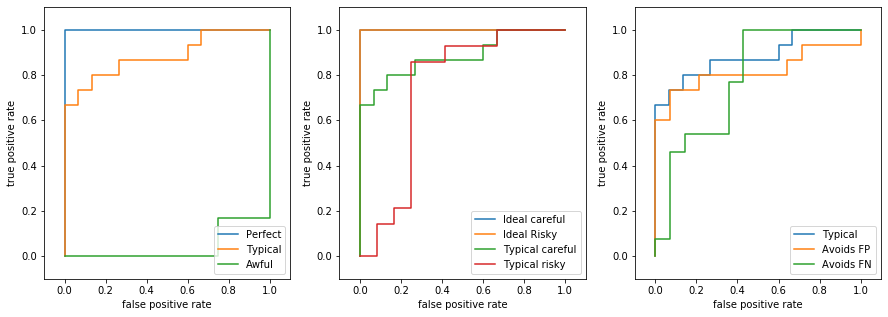

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
aucs = ""
for actual, predicted, descr in zip([actual_0, actual_1, actual_2], 
                                    [predicted_0, predicted_1, predicted_2],
                                    ["Perfect", "Typical", "Awful"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label=descr)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplot(1, 3, 2)
for actual, predicted, descr in zip([actual_0, actual_0r, actual_1, actual_1r], 
                                    [predicted_0, predicted_0r, predicted_1, predicted_1r],
                                    ["Ideal careful", "Ideal Risky", "Typical careful", "Typical risky"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplot(1, 3, 3)
for actual, predicted, descr in zip([actual_1, actual_10, actual_11], 
                                    [predicted_1, predicted_10, predicted_11], 
                                    ["Typical", "Avoids FP", "Avoids FN"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    aucs += descr + ":%3f"%roc_auc_score(actual, predicted) + " "
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])
print(aucs)

После того, как кривая построена, удобно выбирать порог бинаризации, в котором будет достигнут компромисс между FP или FN. Порог соответствует точке на кривой. Если мы хотим избежать ошибок FP, нужно выбирать точку на левой стороне квадрата (как можно выше), если FN - точку на верхней стороне квадрата (как можно левее). Все промежуточные точки будут соответствовать разным пропорциям FP и FN.

In [30]:
aucs = ""
koeffs_fpr = []
koeffs_tpr = []
koeffs_thr = []
roc_auc_sc= []

for actual, predicted, descr in zip([actual_0, actual_1, actual_2, actual_0r, actual_1r, actual_10, actual_11], 
                                    [predicted_0, predicted_1, predicted_2, predicted_0r, predicted_1r, predicted_10, predicted_11],
                                    ["Perfect", "Typical", "Awful", "Ideal Risky","Typical risky", "Avoids FP", "Avoids FN"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    koeffs_fpr.append(fpr)
    koeffs_tpr.append(tpr)
    koeffs_thr.append(thr)
    roc_auc_sc.append(roc_auc_score(actual, predicted))
    